In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import usual libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform, randint

In [6]:
# Loading data
X = pd.read_csv("/home/hailinh/code/szaboildi/uk-pol-speech-classifier/processed_data/features_1000sample_400min_600cutoff_tfidf.csv")
y = pd.read_csv("/home/hailinh/code/szaboildi/uk-pol-speech-classifier/processed_data/target_1000sample_400min_600cutoff_tfidf.csv")

In [7]:
X

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6997,0.0,0.0,0.086956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6998,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
y

,party
0,Con
1,Con
2,Con
3,Con
4,Con
...,...
6995,UUP
6996,UUP
6997,UUP
6998,UUP


In [9]:
# Convert one-hot encoded target array back to class labels
#y = y.drop(columns="Unnamed: 0")
#y_not_encoded = y.columns.get_indexer(y.idxmax(1))+1
#y_not_encoded


In [10]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'C': uniform(0.1, 10),  # Penalty parameter C (regularization parameter)
    'kernel': ['linear', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}

# Create an SVM classifier
svm_classifier = SVC()

# Perform random search cross-validation
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_grid, n_iter=60, scoring='accuracy', cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Best cross-validation score
print("Best Cross-validation Score:", random_search.best_score_)

# Evaluate the best model on test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy)

Best Hyperparameters: {'C': 1.3248964384335793, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-validation Score: 0.6376785714285714
Accuracy on Test Data: 0.6571428571428571


In [10]:
model = SVC(kernel="linear", gamma="scale", C=1.32)
model.fit(X_train, y_train)

SVC(C=1.32, kernel='linear')

In [11]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.64


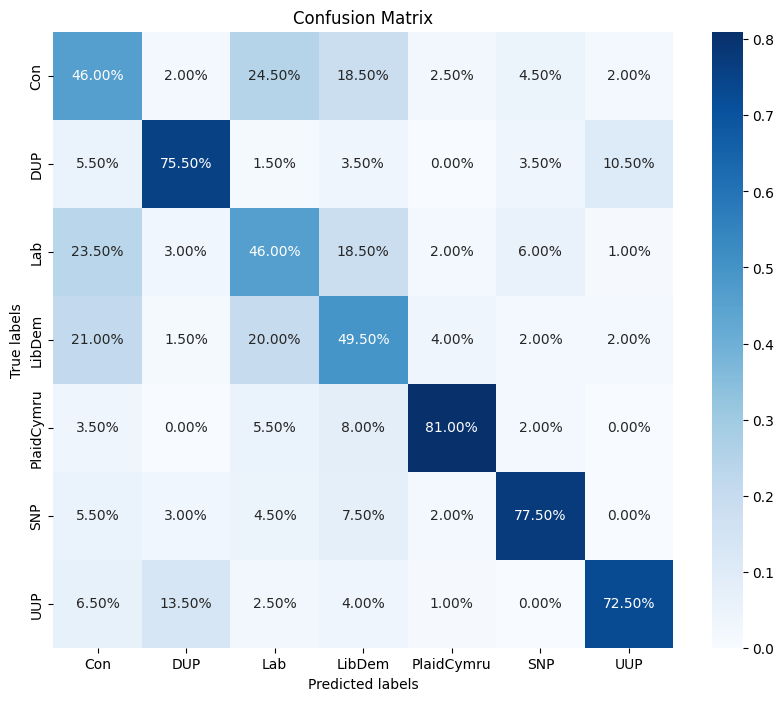

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, predictions, normalize="true")
labels=["Con", "DUP", "Lab", "LibDem", "PlaidCymru", "SNP", "UUP"]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Load saved model SVM linear and plot confusion matrix

In [2]:
import joblib
import os
import glob

In [3]:
# Get model

latest_model = joblib.load("/home/hailinh/code/szaboildi/uk-pol-speech-classifier/training_outputs/models/20240515-103759.pkl")

In [11]:
predictions = latest_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6078571428571429


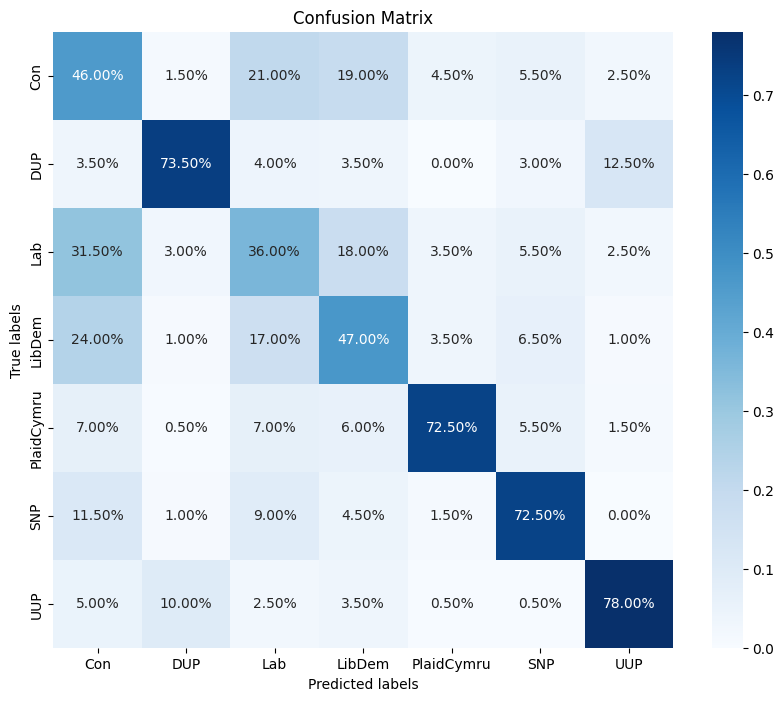

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, predictions, normalize="true")
labels=["Con", "DUP", "Lab", "LibDem", "PlaidCymru", "SNP", "UUP"]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

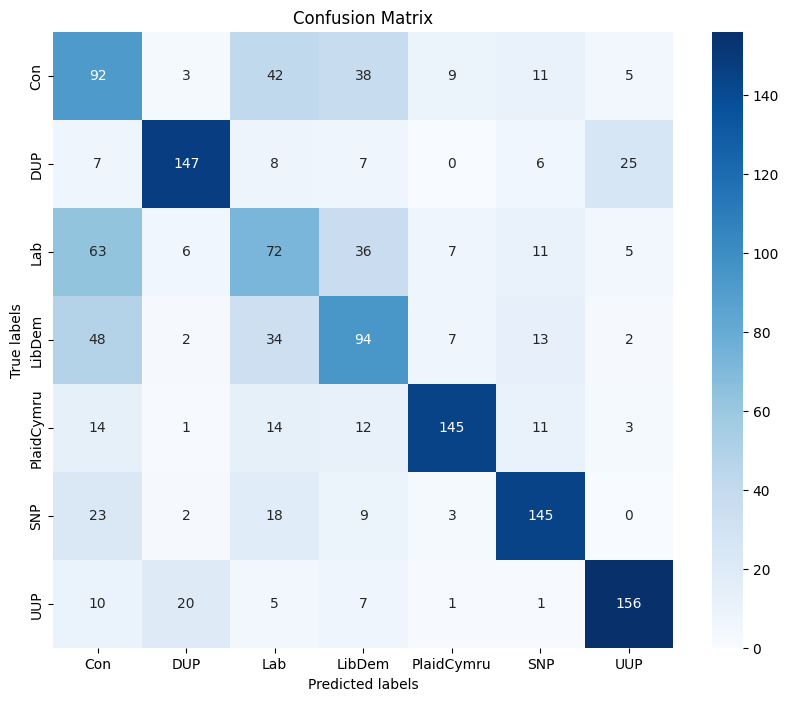

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
labels=["Con", "DUP", "Lab", "LibDem", "PlaidCymru", "SNP", "UUP"]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()